Module 2 and 3

In [12]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'Medicaid1986.csv'  # Update with the correct file path if needed
data = pd.read_csv(file_path)

data.head()
# 1. Data Deduplication
# Remove duplicate rows
data_deduplicated = data.drop_duplicates()

# 2. Replacing Values
# Example: Replace placeholder 'NA' with np.nan
data_replaced = data_deduplicated.replace('NA', np.nan)

# 3. Discretization and Binning
# Example: Assuming there's a column 'age' for binning into age groups
if 'age' in data_replaced.columns:
    bins = [0, 18, 35, 50, 65, np.inf]
    labels = ['0-18', '19-35', '36-50', '51-65', '65+']
    data_replaced['age_group'] = pd.cut(data_replaced['age'], bins=bins, labels=labels)

# 4. Handling Missing Data
# Traditional Method: Mean Imputation for numeric columns
data_handled = data_replaced.copy()
for column in data_handled.select_dtypes(include=[np.number]).columns:
    data_handled[column].fillna(data_handled[column].mean(), inplace=True)

# MLE: Discussed but requires statistical models
# Example: Using MLE would involve advanced techniques like EM algorithms or specific library functions

# Save the cleaned dataset to a new file
output_file = 'Processed_Medicaid1986.csv'
data_handled.to_csv(output_file, index=False)

# Print a summary of the processing
print(f"Original dataset shape: {data.shape}")
print(f"After deduplication: {data_deduplicated.shape}")
print(f"Missing values handled: {data_handled.isnull().sum().sum()}")
print(f"Processed data saved to {output_file}")


Original dataset shape: (996, 15)
After deduplication: (996, 15)
Missing values handled: 0
Processed data saved to Processed_Medicaid1986.csv


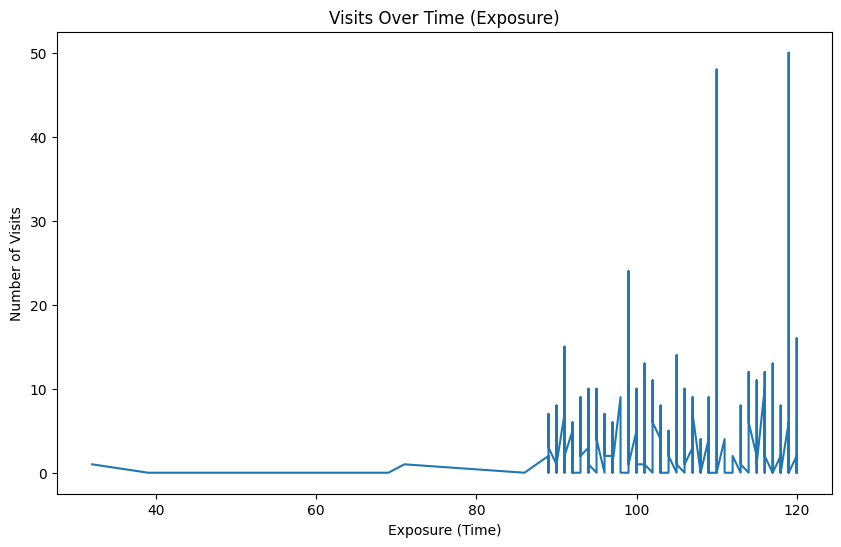

<Figure size 1000x800 with 0 Axes>

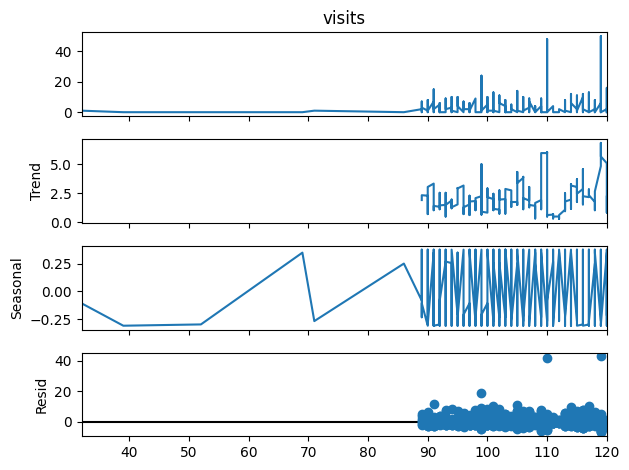

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 visits   No. Observations:                  996
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2619.086
Date:                Fri, 22 Nov 2024   AIC                           5244.171
Time:                        21:17:18   BIC                           5258.879
Sample:                             0   HQIC                          5249.763
                                - 996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0137      0.041      0.332      0.740      -0.067       0.094
ma.L1         -0.9963      0.005   -183.106      0.000      -1.007      -0.986
sigma2        11.2650      0.104    108.610      0.0

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


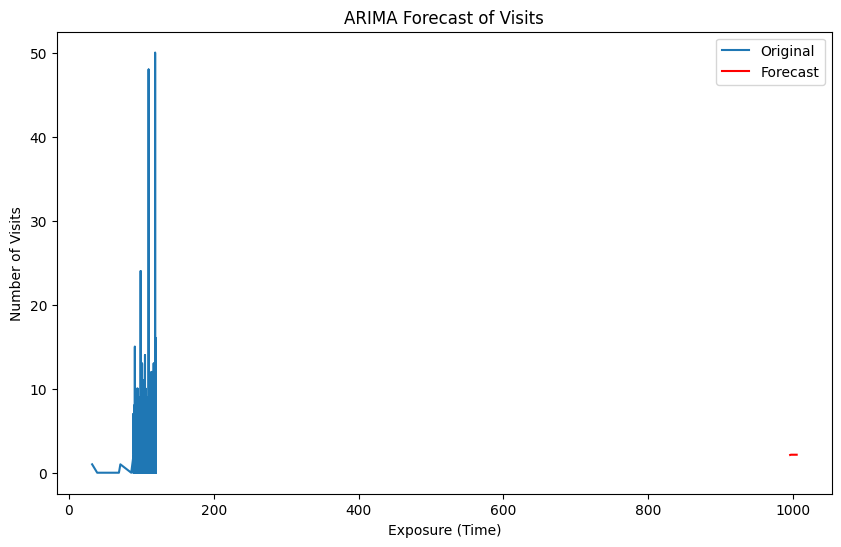

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Assume 'exposure' is a time-related feature and 'visits' is the variable we want to analyze
# Sort the data based on 'exposure' to mimic a time series
medicaid_data = data.sort_values('exposure')

# Set 'exposure' as the index (if 'exposure' represents a time feature)
medicaid_data.set_index('exposure', inplace=True)

# Plot the time series of 'visits' over 'exposure'
plt.figure(figsize=(10, 6))
plt.plot(medicaid_data.index, medicaid_data['visits'])
plt.title('Visits Over Time (Exposure)')
plt.xlabel('Exposure (Time)')
plt.ylabel('Number of Visits')
plt.show()

# Decomposing the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(medicaid_data['visits'], period=12, model='additive')

# Plotting the decomposition
plt.figure(figsize=(10, 8))
decomposition.plot()
plt.show()

# Build and fit an ARIMA model for forecasting
# Choosing ARIMA parameters (p, d, q) can be complex and may require optimization; here we use (1, 1, 1) for demonstration
model = ARIMA(medicaid_data['visits'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecasting the next 10 time periods
forecast = model_fit.forecast(steps=10)
print("Forecast for next 10 periods:\n", forecast)

# Plotting the forecast along with the original data
plt.figure(figsize=(10, 6))
plt.plot(medicaid_data.index, medicaid_data['visits'], label='Original')
plt.plot(range(len(medicaid_data), len(medicaid_data) + 10), forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast of Visits')
plt.xlabel('Exposure (Time)')
plt.ylabel('Number of Visits')
plt.legend()
plt.show()

Module 4

Statistical Summary Measures:
          rownames      visits    exposure    children         age  \
count   996.000000  996.000000  996.000000  996.000000  996.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean    498.500000    1.930723  104.060241    1.314257   55.205823   
std     287.664735    3.354472    9.144973    1.509314   24.961373   
min       1.000000    0.000000   32.000000    0.000000   16.000000   
25%     249.750000    0.000000   98.000000    0.000000   29.000000   
50%     498.500000    1.000000  104.000000    1.000000   66.000000   
75%     747.250000    3.000000  111.000000    2.000000   78.000000   
max     996.000000   50.000000  120.000000    9.000000  105.000000   

            income     health1     health2      access married  gender  \
count   996.000000  996.000000  996.000000  996.000000 

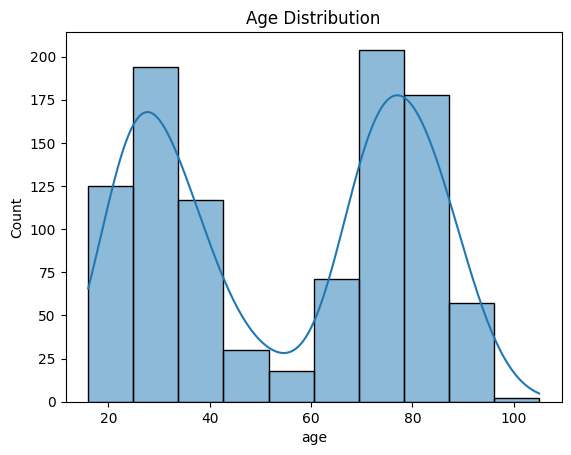

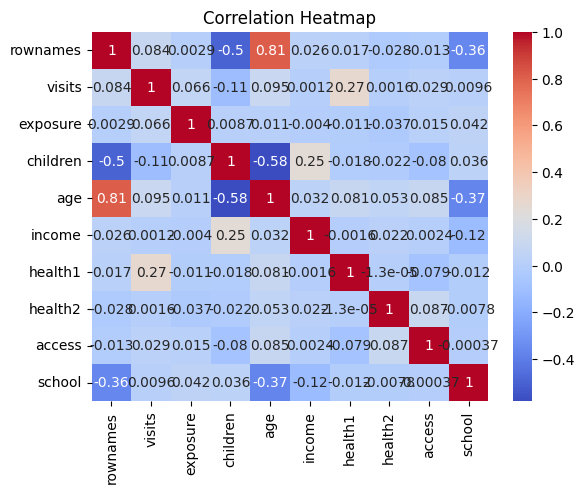

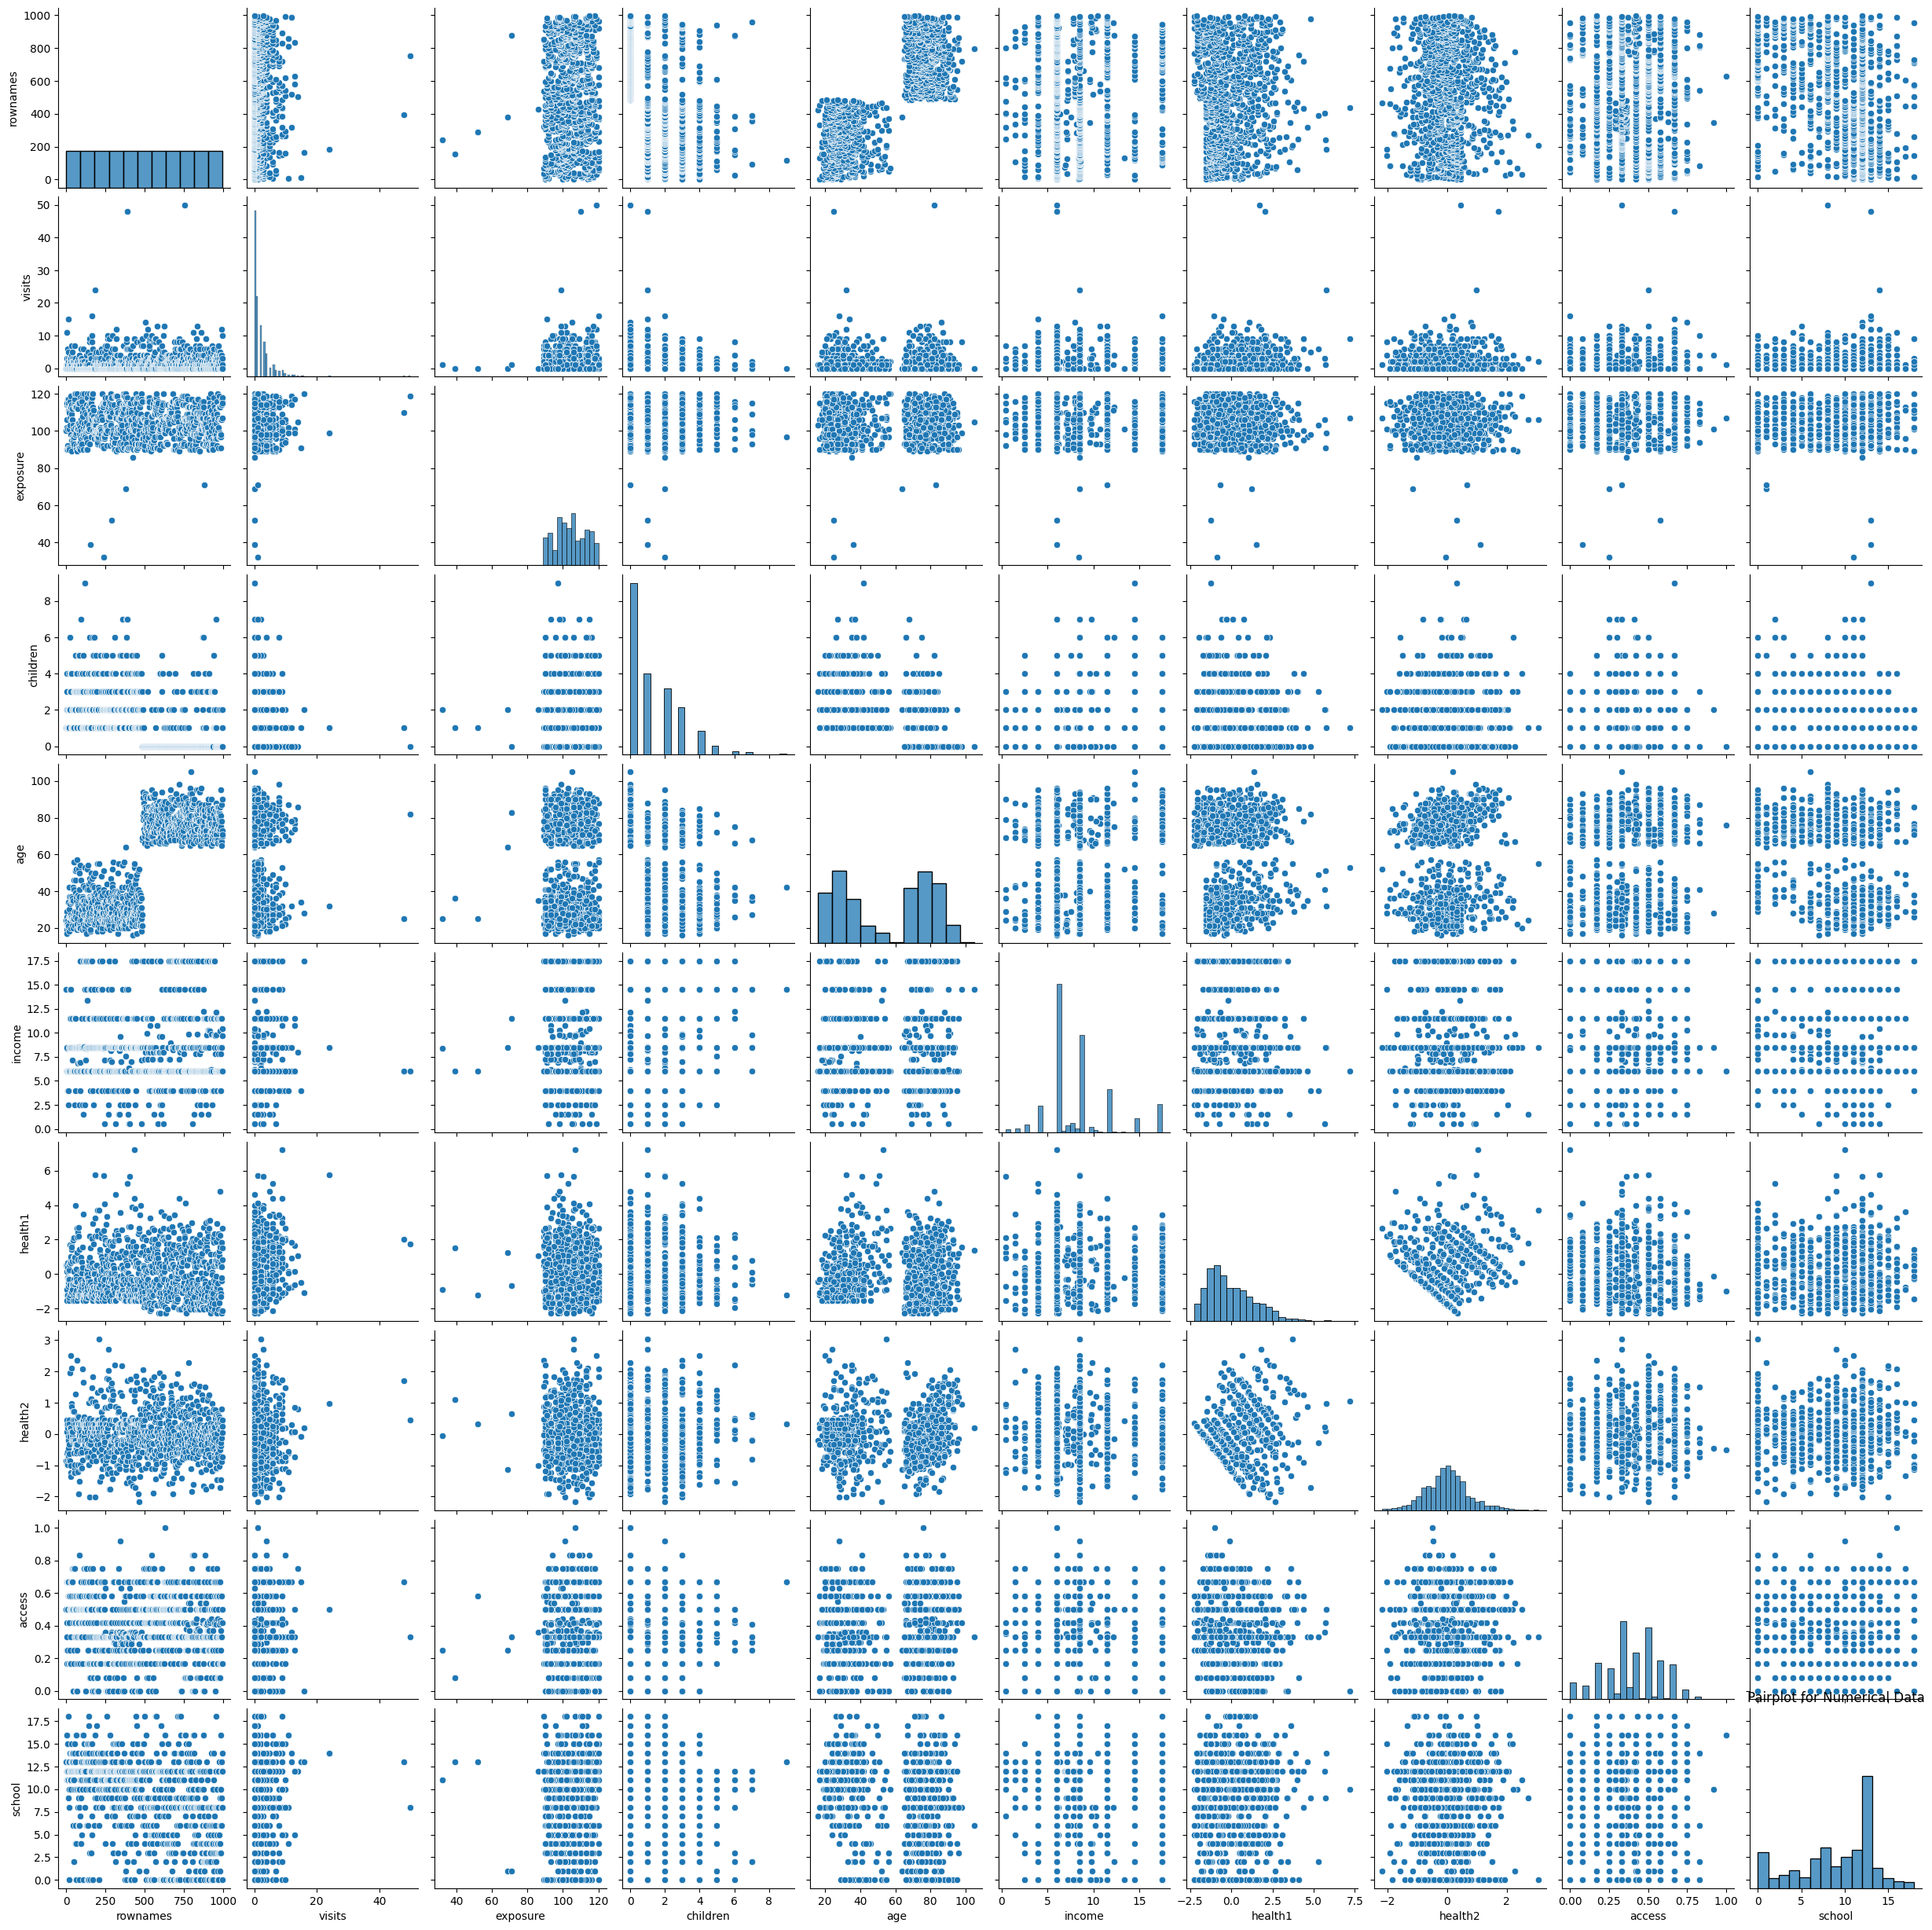

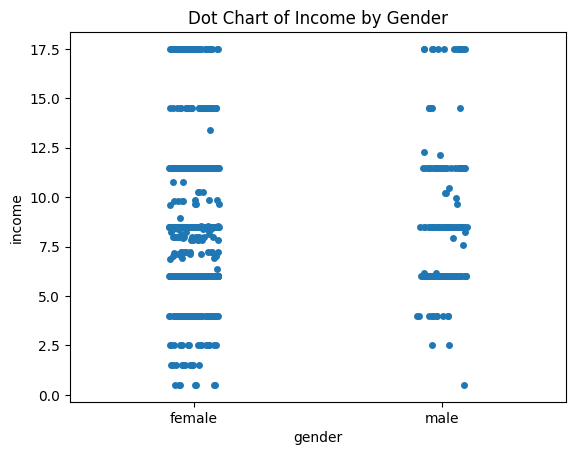

Processed data saved to Processed_Medicaid1986.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Medicaid1986.csv'  # Update with the correct path
data = pd.read_csv(file_path)

# Step 1: Statistical Summary Measures
summary = data.describe(include='all')  # Summary for numeric and categorical data
print("Statistical Summary Measures:")
print(summary)

# Step 2: Data Elaboration
# Check for null values and fill or handle them
print("Missing Data Before Handling:")
print(data.isnull().sum())
data = data.fillna(data.median(numeric_only=True))  # Example: Fill numeric columns with median
data = data.fillna('Unknown')  # Fill non-numeric columns with 'Unknown'
print("Missing Data After Handling:")
print(data.isnull().sum())

# Step 3: 1-D Statistical Analysis
# Example: Analyze a numeric column, e.g., 'age'
if 'age' in data.columns:
    print("Age Distribution:")
    print(data['age'].describe())
    sns.histplot(data['age'], bins=10, kde=True)
    plt.title('Age Distribution')
    plt.show()

# Step 4: 2-D Statistical Analysis
# Example: Correlation heatmap for numeric columns
correlation = data.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 5: Contingency Tables
# Example: Contingency table for two categorical variables
if 'gender' in data.columns and 'region' in data.columns:
    contingency_table = pd.crosstab(data['gender'], data['region'])
    print("Contingency Table (Gender vs Region):")
    print(contingency_table)

# Step 6: n-D Statistical Analysis
# Example: Pairplot for multivariate analysis
sns.pairplot(data.select_dtypes(include=[np.number]))
plt.title('Pairplot for Numerical Data')
plt.show()

# Step 7: Visualization
# Scatter Plot
if 'income' in data.columns and 'expenses' in data.columns:
    sns.scatterplot(x='income', y='expenses', data=data)
    plt.title('Income vs Expenses Scatter Plot')
    plt.show()

# Dot Chart
if 'gender' in data.columns and 'income' in data.columns:
    sns.stripplot(x='gender', y='income', data=data)
    plt.title('Dot Chart of Income by Gender')
    plt.show()

# Bar Plot
if 'region' in data.columns:
    sns.countplot(x='region', data=data)
    plt.title('Bar Plot of Region Count')
    plt.show()

# Save processed data
output_file = 'Processed_Medicaid1986.csv'
data.to_csv(output_file, index=False)
print(f"Processed data saved to {output_file}")


Module 5

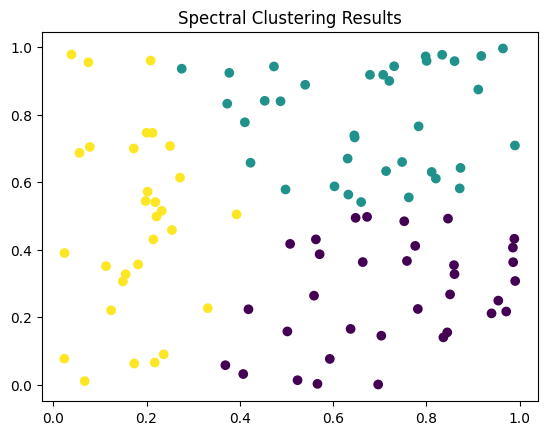

In [5]:
# 1. Spectral Clustering

from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_kernels
import numpy as np

# Example dataset (or replace with your data)
data = np.random.rand(100, 2)  # Replace with your dataset

# Perform spectral clustering
spectral = SpectralClustering(n_clusters=3, affinity='rbf', random_state=42)
labels = spectral.fit_predict(data)

# Plot results
import matplotlib.pyplot as plt
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title('Spectral Clustering Results')
plt.show()


In [6]:
# 2. Document Clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Example dataset
documents = ["Text document clustering example",
             "Another example of text clustering",
             "Document clustering with KMeans"]

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Display results
for doc, cluster in zip(documents, labels):
    print(f"Document: {doc}, Cluster: {cluster}")


Document: Text document clustering example, Cluster: 0
Document: Another example of text clustering, Cluster: 0
Document: Document clustering with KMeans, Cluster: 1


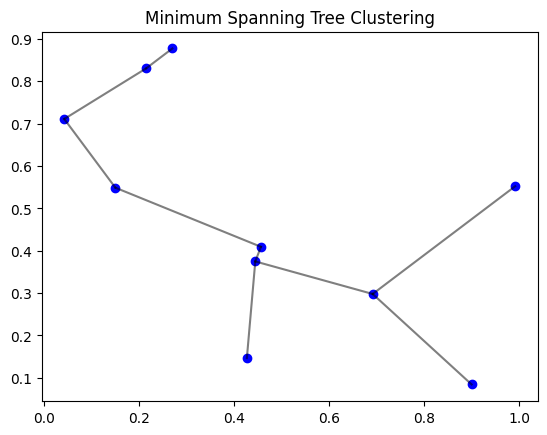

In [8]:
# 3 Minimum Spanning Tree (MST) Clustering
from scipy.spatial import distance
from scipy.sparse.csgraph import minimum_spanning_tree
from sklearn.neighbors import kneighbors_graph
import numpy as np
import matplotlib.pyplot as plt

# Example dataset
data = np.random.rand(10, 2)  # Replace this with your actual dataset

# Compute MST (n_neighbors < number of samples)
n_neighbors = 5  # Choose a value less than the number of samples
graph = kneighbors_graph(data, n_neighbors=n_neighbors, mode='distance')
mst = minimum_spanning_tree(graph)
mst = mst.toarray()

# Plot MST
plt.scatter(data[:, 0], data[:, 1], color='blue')
for i, row in enumerate(mst):
    for j, weight in enumerate(row):
        if weight > 0:
            plt.plot([data[i, 0], data[j, 0]], [data[i, 1], data[j, 1]], 'k-', alpha=0.5)
plt.title('Minimum Spanning Tree Clustering')
plt.show()


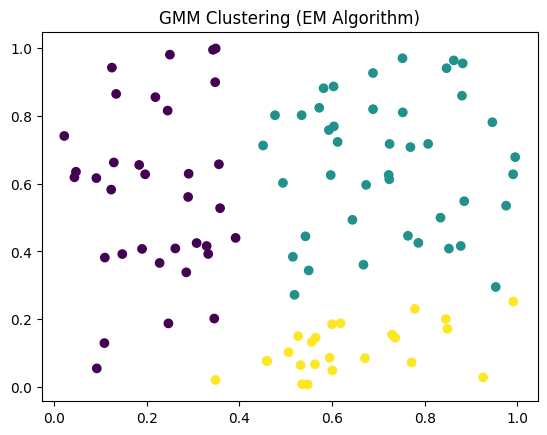

In [9]:
# 4. Model-Based Clustering

from sklearn.mixture import GaussianMixture

# Example dataset
data = np.random.rand(100, 2)

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
labels = gmm.fit_predict(data)

# Plot results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title('GMM Clustering (EM Algorithm)')
plt.show()


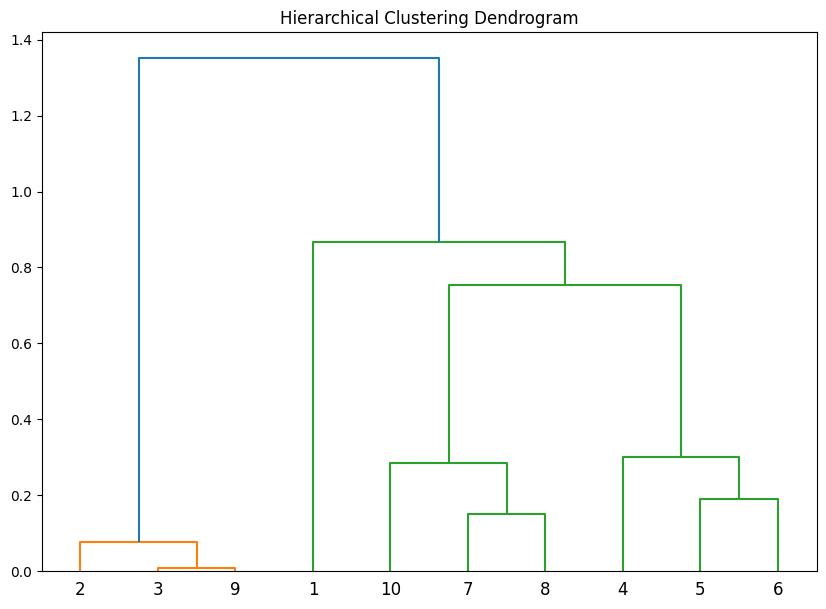

In [10]:
# 5. Hierarchical Agglomerative Model-Based Clustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Example dataset
data = np.random.rand(10, 2)

# Perform hierarchical clustering
linked = linkage(data, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=range(1, len(data) + 1))
plt.title('Hierarchical Clustering Dendrogram')
plt.show()



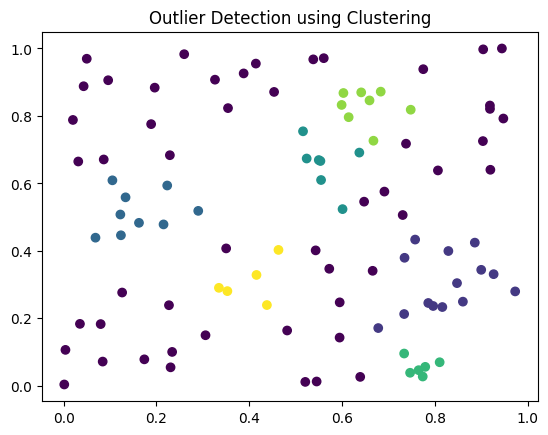

In [11]:
# 6. Outlier Detection Using Clustering

from sklearn.cluster import DBSCAN

# Example dataset
data = np.random.rand(100, 2)

# Apply DBSCAN for clustering and outlier detection
dbscan = DBSCAN(eps=0.1, min_samples=5)
labels = dbscan.fit_predict(data)

# Plot results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title('Outlier Detection using Clustering')
plt.show()


module 6

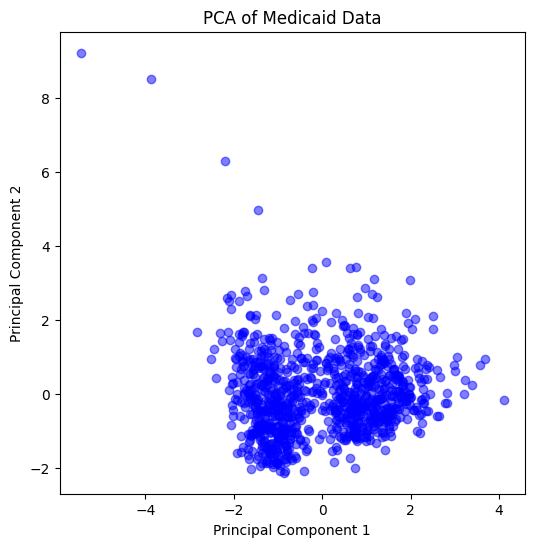

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Selecting numerical columns for PCA
numerical_columns = ['visits', 'exposure', 'children', 'age', 'income', 'health1', 'health2', 'access']
data_numerical = data[numerical_columns]

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

# Performing PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Plotting PCA result
plt.figure(figsize=(6, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', alpha=0.5)
plt.title('PCA of Medicaid Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Display the PCA plot
plt.show()

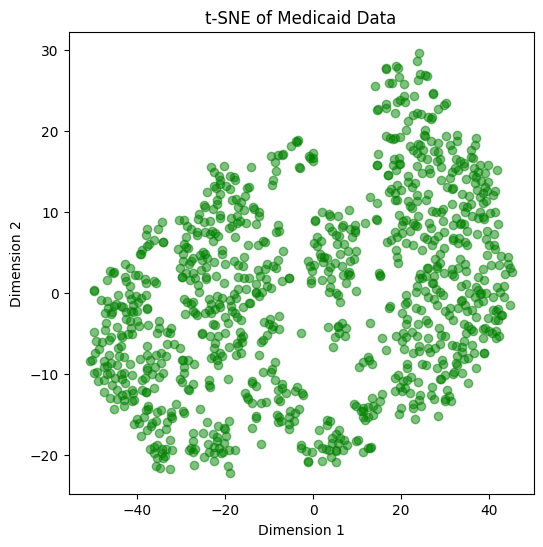

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


# Selecting numerical columns for t-SNE
numerical_columns = ['visits', 'exposure', 'children', 'age', 'income', 'health1', 'health2', 'access']
data_numerical = data[numerical_columns]

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

# Performing t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data_scaled)

# Plotting t-SNE result
plt.figure(figsize=(6, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='green', alpha=0.5)
plt.title('t-SNE of Medicaid Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Display the t-SNE plot
plt.show()


module 7

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example dataset
X = data[['age', 'exposure']]  # Independent variables (features)
y = data['income']  # Dependent variable (target)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the model
lr_model = LinearRegression()

# Training the model
lr_model.fit(X_train, y_train)

# Predicting
y_pred = lr_model.predict(X_test)

In [28]:
# Calculating MSE
mse = mean_squared_error(y_test, y_pred)

# Calculating R-squared
r_squared = lr_model.score(X_test, y_test)

print(f"MSE: {mse}")
print(f"R-squared: {r_squared}")

MSE: 11.7202599031758
R-squared: -0.005846830120866953
